# Capstone Project: Car Accident Severity
**Hello Capstone Project Course!**

Final module of IBM Specialization course in Data Science.
<img src="./crashOK.jpg" />

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#introduction">Introduction</a></li>
        <li><a href="#bussiness">Business Problem</a></li>
        <li><a href="#data">Data</a></li>
        <li><a href="#methodology">Methodology</a></li>
        <li><a href="#results">Results and Discussion</a></li>
        <li><a href="#conclusion">Conclusion</a></li>
    </ol>
</div>
<br>
<hr>

# Introduction <a name="introduction"></a>
<hr style="border:2px solid gray"> </hr>

> For this notebook, I am going to explore, use and create a model based on the [Seattle accident dataset](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv "Click to download"). 
You can also see the Metadata [here](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf).
As it is a labeled dataset, I am going to use **Supervised Machine Learning**. Also this work is based on the Cross-industry standard process for data mining (CRISP-DM) and its six stages:
- Bussiness Understanding
- Data Understanding
- Data Preparation and Cleaning
- Modeling
- Evaluation
- Deployment

# Business Problem <a name="bussiness"></a>
<hr style="border:2px solid gray"> </hr>

> Today, having a vehicle is practically a basic necessity for people anywhere in the world. However, due to the large number of people, means of transport and different climatic or circumstantial factors, road accidents are part of the day to day in cities around the world. For this reason, it is important for any driver to be able to avoid an accident, especially those of high severity, which can result in a catastrophic end. 

> Being able to predict the severity or probability of an accident is highly useful for the well-being of any driver or pedestrian. This would undoubtedly help all drivers to have a greater perspective on possible accidents and thus make the best decision about whether to drive, not drive or do it safely.

# Data <a name="data"></a>
<hr style="border:2px solid gray"> </hr>

> For the analysis and the creation of a predictive model using supervised machine learning, the [Seattle Dataset](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf). mencioned at the Introduction with the reports of road accidents (collisions) will be used, where 'SEVERITYCODE' will be the target variable to predict.
First, the information will be analyzed to determine which of the attributes have the greatest correlation with the target variable, among which are probably: 'ROADCOND', 'SPEEDING', 'WEATHER', 'COLLISIONTYPE', and some others. Once identified, the data will be cleaned up based on data visualization for modeling.

## Important data features

**Accident details**
* `SEVERITYCODE`: severity of accident, target variable. 
    * 1: _Property Damage Only_ 
    * 2: _Injury_
    
* `SEVERITYDESC`: complementary description to the code.

* `COLLISIONTYPE`: type of collision, general description.


**Location and time**
* `LOCATION`: general address.
* `X`, `Y`: exact location of the accident.
* `ADDRTYPE`: whether the accident occured in an alley, block or intersection.
* `JUNCTIONTYPE`: category of junction, for example: mid-block, intersection, driveway, etc.
* `INCDATE`, `INCDTTM`: date and time of the incident.


**People affected**
* `PERSONCOUNT`: total number or people involved.
* `PEDCOUNT`, `PEDROWNOTGRNT`: number of pedestrians involved and whether their right of way was granted or not.
* `PEDCYLCOUNT`: number of bicycles involved.
* `VEHCOUNT`, `HITPARKEDCAR`: number of vehicles involved and whether it was a parked car or not.

**Driver fault**
* `INATTENTIONIND`: whether or not the driver was unattentive.
* `UNDERINFL`: whether or not the driver was under influence of drugs or alcohol.
* `SPEEDING`: whether or not the drives was speeding.

**Environmental issues**
* `WEATHER`: general description of the weather condition during the accident: clear, raining, snowing, etc.
* `ROADCOND`, `LIGHTCOND`: the condition of the road and light, for example: dry or wet and daylight or dark.

### General Approach
With all the data above, it is possible to determine interesting situations and make questions about them.
1. When do most accidents happen? On weekdays or the weekend?
1. Is wheather a key factor in road accidents?
1. Is the number of people affected related to the severity of the accident?
1. Which causes more accidents? Inattention, speeding or the influence of alcohol or another drug?

## Client
> The main objective is to identify the severity (1 or 2) or probability of a possible accident, so this work can be useful for anyone interested in assessing risks while driving, the traffic control departments or simply for anyone who drives a vehicle.

# Methodology <a name="methodology"></a>
<hr style="border:2px solid gray"> </hr>

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline
# ! pip install missingno

## Data Understanding

**Load Data From CSV File**

In [3]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

C:\Users\Samuel EBM\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


**Look up for missing data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

Observations:
* There is a lot of missing data, but for some features it could be handled.
* Some datatype are mistaken or could be improved.

Let's see exactly how many data is missing:

In [5]:
missing = df.isnull().sum().to_frame()
missing = missing.reset_index()
missing.columns = ['Feature','Count of missing values']
missing = missing[missing['Count of missing values']>0].sort_values(by="Count of missing values", ascending=False)
missing

,Feature,Count of missing values
30,PEDROWNOTGRNT,190006
12,EXCEPTRSNDESC,189035
32,SPEEDING,185340
25,INATTENTIONIND,164868
9,INTKEY,129603
11,EXCEPTRSNCODE,109862
31,SDOTCOLNUM,79737
22,JUNCTIONTYPE,6329
2,Y,5334
1,X,5334


**Lets make a graph of this missing data**

This is the data distribution before processing.

<Figure size 720x360 with 0 Axes>

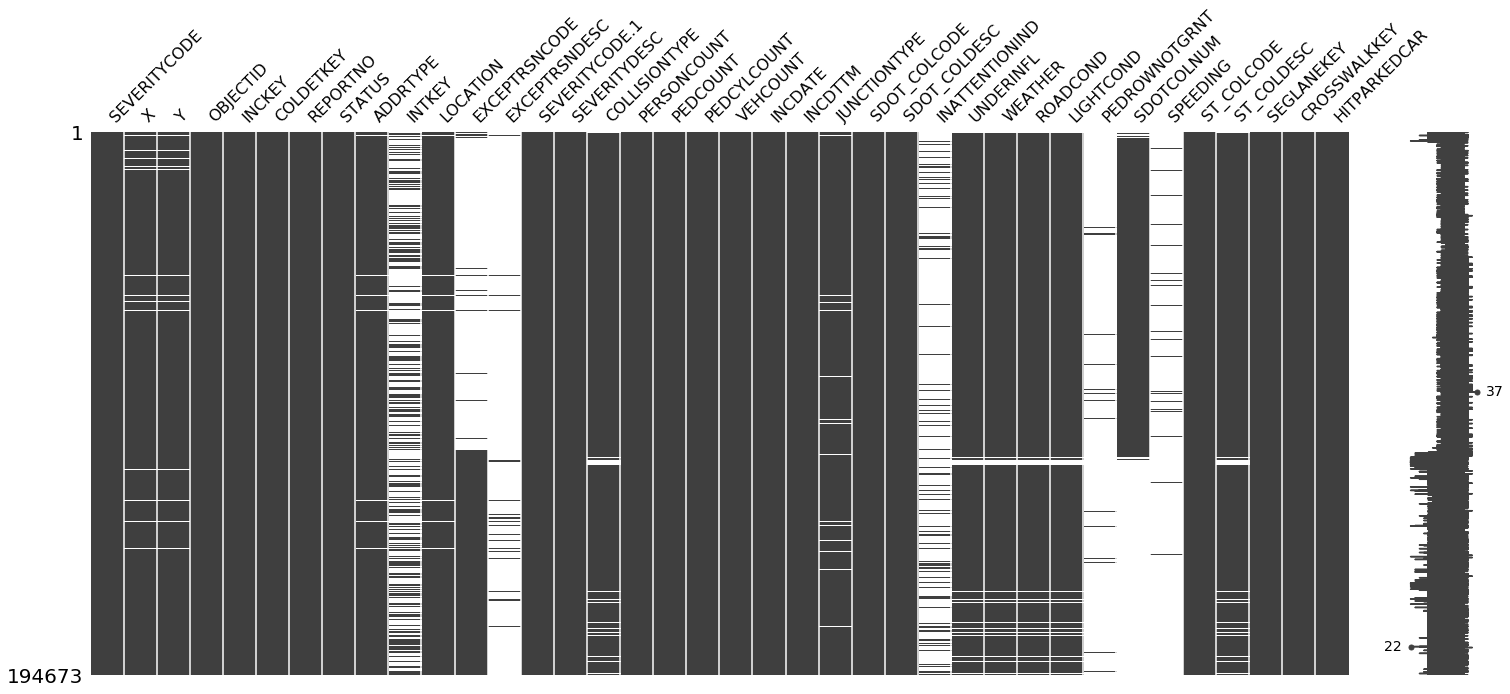

In [6]:
import missingno as msn
plt.figure(figsize=(10,5))
msn.matrix(df)
plt.show()

## Data Preparation and Cleaning

**Fill in missing values**

In [7]:
df_full = df.copy()

# PEDROWNOTGRNT has only 'Y' values. Replace NaN with 'N'.
df_full['PEDROWNOTGRNT'].fillna("N", inplace=True) 

# EXCEPTRSNDESC will be dropped, as it has not valuable information.
df_full.drop('EXCEPTRSNDESC', axis=1, inplace=True)

# SPEEDING has only 'Y' values. Replace NaN with 'N'.
df_full['SPEEDING'].fillna("N", inplace=True)

# INATTENTIONIND only Y has been entered. Replace NaN with 'N'.
df_full['INATTENTIONIND'].fillna("N", inplace=True)

# INTKEY will be dropped, as it has not valuable information.
df_full.drop('INTKEY', axis=1, inplace=True)

# EXCEPTRSNCODE will be dropped, as it has not valuable information.
df_full.drop('EXCEPTRSNCODE', axis=1, inplace=True)

# SDOTCOLNUM will be dropped, as it has not valuable information.
df_full.drop('SDOTCOLNUM', axis=1, inplace=True)

# JUNCTIONTYPE missing values are 'Unknown'
df_full['JUNCTIONTYPE'].fillna("Unknown",inplace=True)

# X,Y missing values cannot be filled in any way, that rows must be dropped
df_full.dropna(subset=["X"], axis=0, inplace=True) 
df_full.dropna(subset=["Y"], axis=0, inplace=True) 

# LIGHTCOND missing values are 'Unknown'
df_full['LIGHTCOND'].fillna("Unknown",inplace=True)

# WEATHER missing values are 'Unknown'
df_full['WEATHER'].fillna("Unknown",inplace=True)

# ROADCOND missing values are 'Unknown'
df_full['ROADCOND'].fillna("Unknown",inplace=True)

# COLLISIONTYPE missing values cannot be filled in any way, that rows must be dropped
df_full.dropna(subset=["COLLISIONTYPE"], axis=0, inplace=True) 

# ST_COLDESC, missing values are 'Unknown'
df_full['ST_COLDESC'].fillna("Unknown", inplace=True)

# UNDERINFL has 4 categories, for now, lets fill the missing data with '0'
df_full['UNDERINFL'].fillna('0', inplace=True)

# LOCATION missing values are 'Unknown'
df_full['LOCATION'].fillna("Unknown", inplace=True)

# ADDRTYPE, drop rows with missing data
df_full.dropna(subset=["ADDRTYPE"], axis=0, inplace=True) 

# ST_COLCODE, drop rows with missing data, it cannot be fill with any value
df_full.dropna(subset=["ST_COLCODE"], axis=0, inplace=True) 

# Verify there's no more missing data
df_full.isnull().sum()

SEVERITYCODE      0
X                 0
Y                 0
OBJECTID          0
INCKEY            0
COLDETKEY         0
REPORTNO          0
STATUS            0
ADDRTYPE          0
LOCATION          0
SEVERITYCODE.1    0
SEVERITYDESC      0
COLLISIONTYPE     0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
INCDATE           0
INCDTTM           0
JUNCTIONTYPE      0
SDOT_COLCODE      0
SDOT_COLDESC      0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
PEDROWNOTGRNT     0
SPEEDING          0
ST_COLCODE        0
ST_COLDESC        0
SEGLANEKEY        0
CROSSWALKKEY      0
HITPARKEDCAR      0
dtype: int64

**Graphically**

<Figure size 720x360 with 0 Axes>

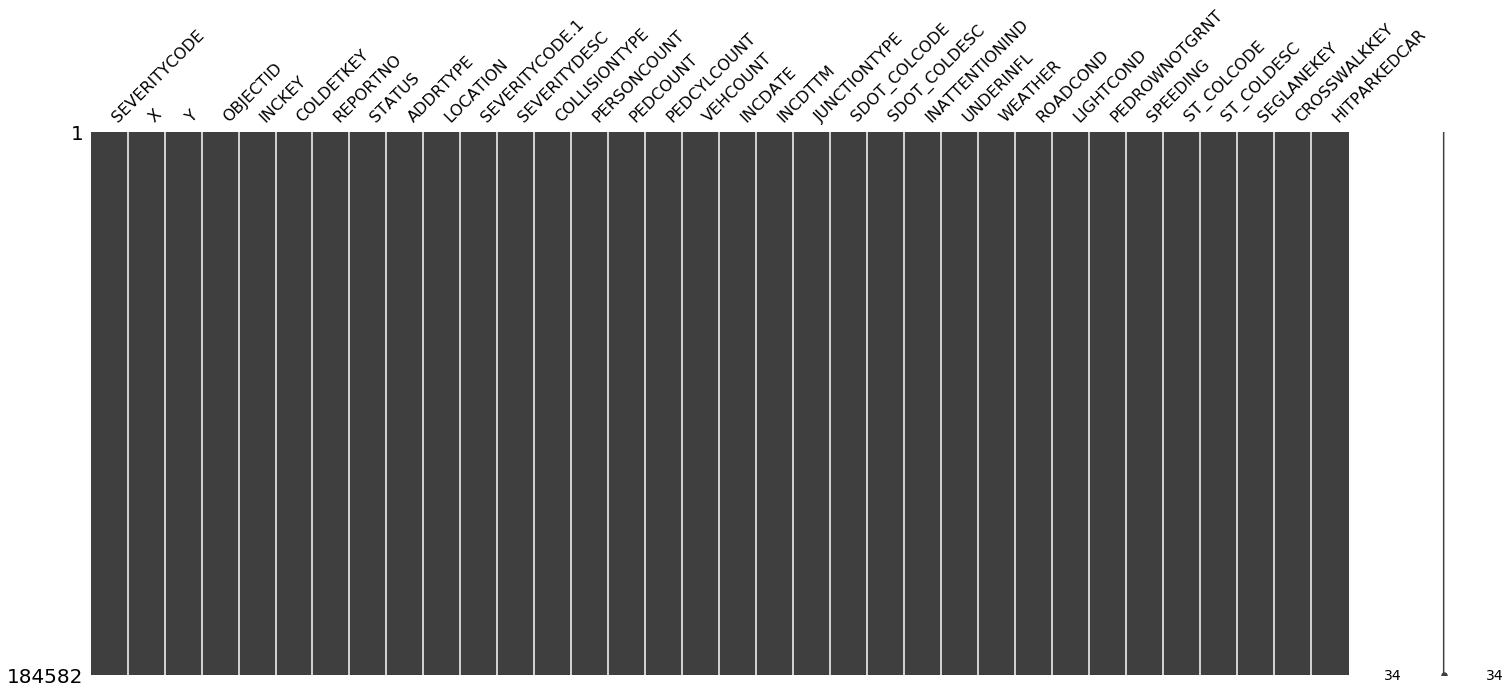

In [8]:
import missingno as msn
plt.figure(figsize=(10,5))
msn.matrix(df_full)
plt.show()

Now there are no missing values, all rows have the complete information.

**Formatting**

In [9]:
df_format = df_full.copy()

# Features with 'Y' and 'N' values to type 'str'
df_format['PEDROWNOTGRNT'].astype('str')
df_format['HITPARKEDCAR'].astype('str')
df_format['UNDERINFL'].astype('str')
df_format['SPEEDING'].astype('str')

# Replace all 'N' to '0' and 'Y' to '1' in the following attributes
replace_values = {'N' : '0', 'Y' : '1'}
df_format = df_format.replace({"INATTENTIONIND": replace_values})
df_format = df_format.replace({"PEDROWNOTGRNT": replace_values})
df_format = df_format.replace({"HITPARKEDCAR": replace_values})
df_format = df_format.replace({"UNDERINFL": replace_values})
df_format = df_format.replace({"SPEEDING": replace_values})

# Convert all these values to integers
df_format[['INATTENTIONIND','PEDROWNOTGRNT','HITPARKEDCAR','UNDERINFL','SPEEDING']] = df_format[['INATTENTIONIND','PEDROWNOTGRNT','HITPARKEDCAR','UNDERINFL','SPEEDING']].astype('int64')

# Verify the changes
print(df_format['UNDERINFL'].value_counts())
print(df_format['SPEEDING'].value_counts())
print(df_format['HITPARKEDCAR'].value_counts())
print(df_format['PEDROWNOTGRNT'].value_counts())
print(df_format['INATTENTIONIND'].value_counts())

0    175702
1      8880
Name: UNDERINFL, dtype: int64
0    175863
1      8719
Name: SPEEDING, dtype: int64
0    177877
1      6705
Name: HITPARKEDCAR, dtype: int64
0    179940
1      4642
Name: PEDROWNOTGRNT, dtype: int64
0    155408
1     29174
Name: INATTENTIONIND, dtype: int64


## Exploratory Data Analysis (EDA)
**Target Variable: `SEVERITYCODE`**
* _1: Property Damage_
* _2: Injury_

**Driver fault analysis**

Text(0.5, 0, '0 = Attentive     1 = Inattentive')

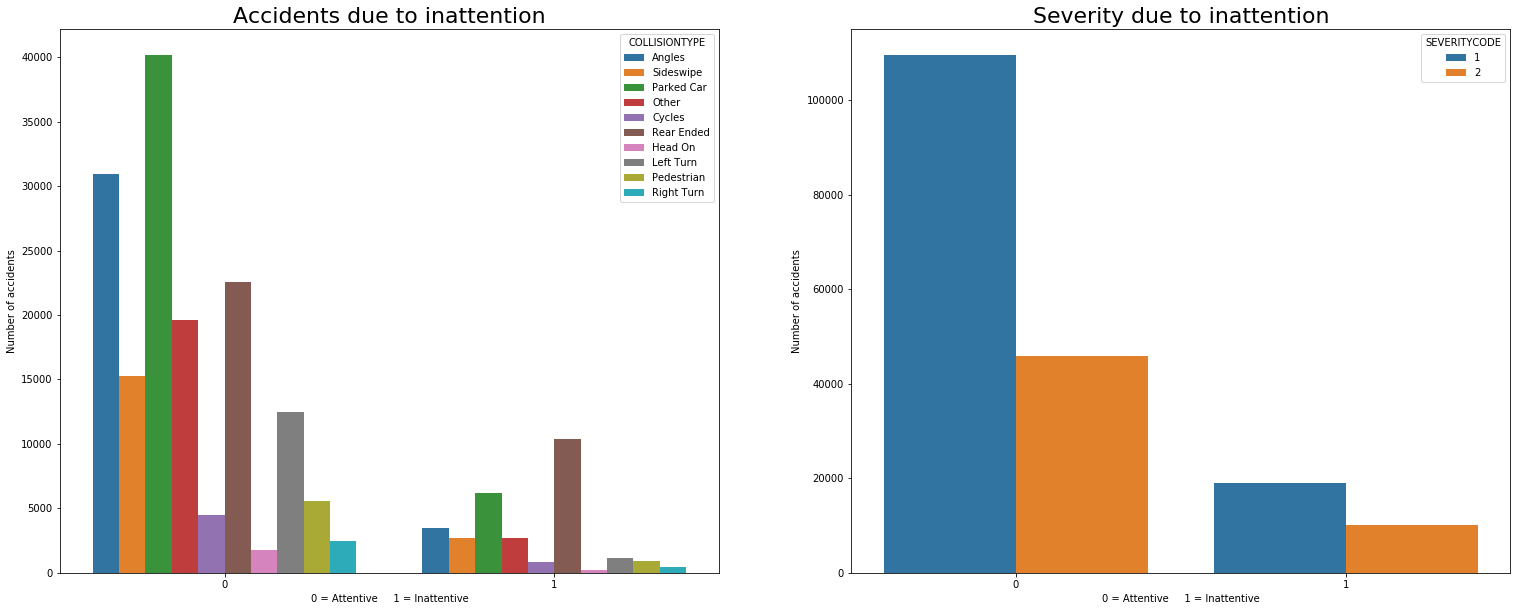

In [10]:
plt.figure(figsize=(26,10))

plt.subplot(1,2,1)
sns.countplot(x="INATTENTIONIND", hue="COLLISIONTYPE", data=df_format)
plt.title("Accidents due to inattention", fontsize=22)
plt.ylabel("Number of accidents")
plt.xlabel("0 = Attentive     1 = Inattentive")

plt.subplot(1,2,2)
sns.countplot(x="INATTENTIONIND", hue="SEVERITYCODE", data=df_format)
plt.title("Severity due to inattention", fontsize=22)
plt.ylabel("Number of accidents")
plt.xlabel("0 = Attentive     1 = Inattentive")

Text(0.5, 0, '0 = Not Speeding     1 = Speeding')

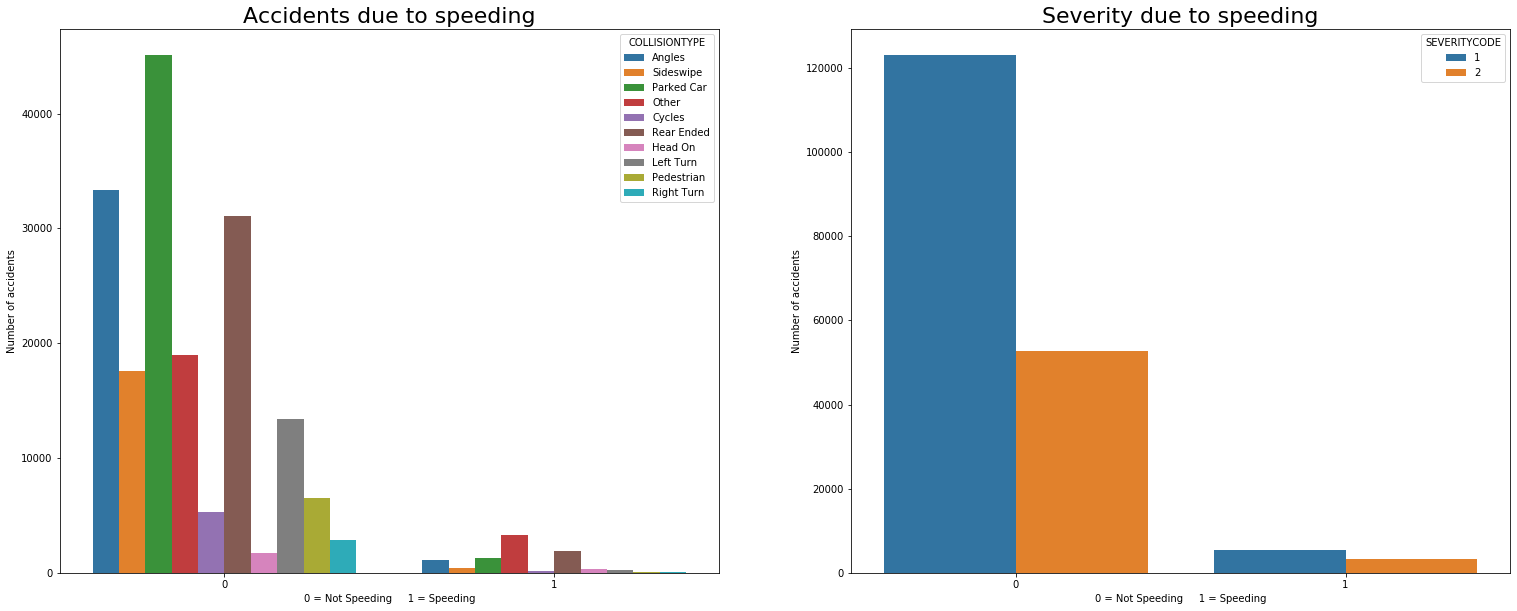

In [11]:
plt.figure(figsize=(26,10))

plt.subplot(1,2,1)
sns.countplot(x="SPEEDING", hue="COLLISIONTYPE", data=df_format)
plt.title("Accidents due to speeding", fontsize=22)
plt.ylabel("Number of accidents")
plt.xlabel("0 = Not Speeding     1 = Speeding")

plt.subplot(1,2,2)
sns.countplot(x="SPEEDING", hue="SEVERITYCODE", data=df_format)
plt.title("Severity due to speeding", fontsize=22)
plt.ylabel("Number of accidents")
plt.xlabel("0 = Not Speeding     1 = Speeding")

Text(0.5, 0, '0 = Not intoxicated     1 = Intoxicated')

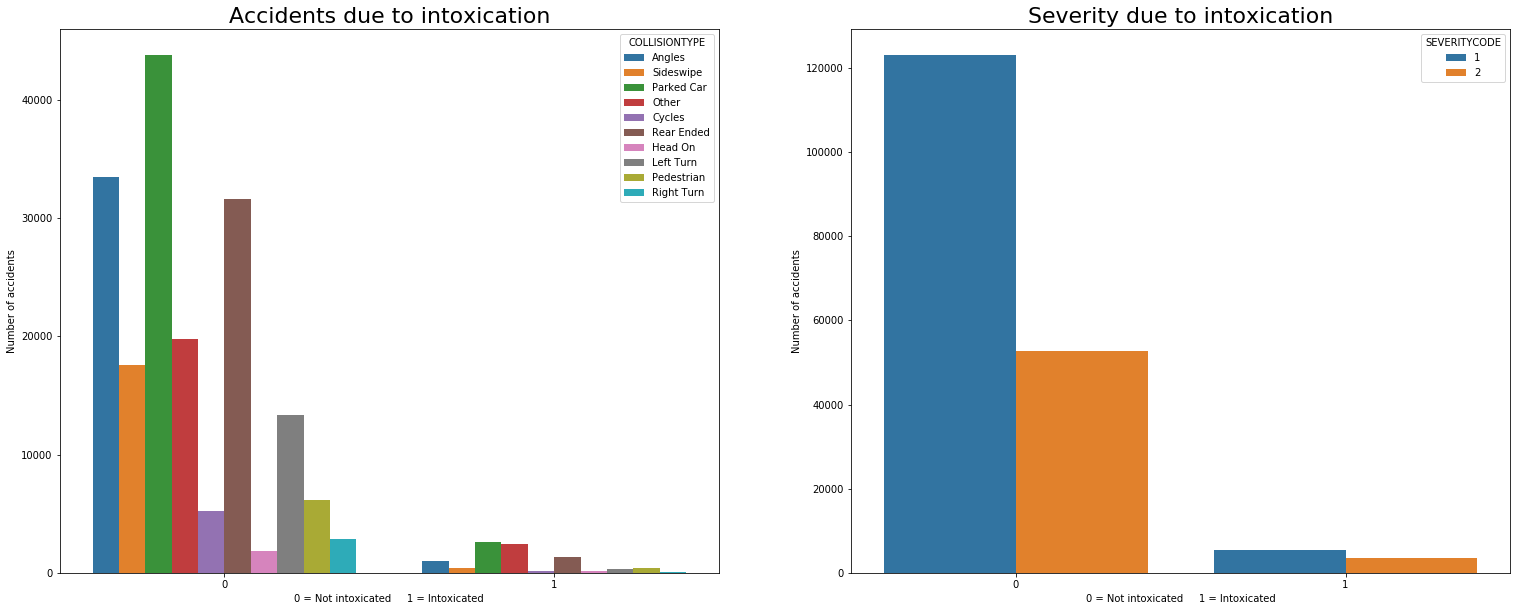

In [12]:
plt.figure(figsize=(26,10))

plt.subplot(1,2,1)
sns.countplot(x="UNDERINFL", hue="COLLISIONTYPE", data=df_format)
plt.title("Accidents due to intoxication", fontsize=22)
plt.ylabel("Number of accidents")
plt.xlabel("0 = Not intoxicated     1 = Intoxicated")

plt.subplot(1,2,2)
sns.countplot(x="UNDERINFL", hue="SEVERITYCODE", data=df_format)
plt.title("Severity due to intoxication", fontsize=22)
plt.ylabel("Number of accidents")
plt.xlabel("0 = Not intoxicated     1 = Intoxicated")

**Observations**
* Speeding and intoxication do not cause many accidents. Compared with other cities, it seems that Seattle has well controlled its system to avoid these types of problems.
* Most accidents are caused by negligence of drivers are simple inattention.
* Most collisions are against parked vehicles, the rear end and angles of the vehicles.

**Wheater and time factors**

Text(0, 0.5, 'Number of accidents')

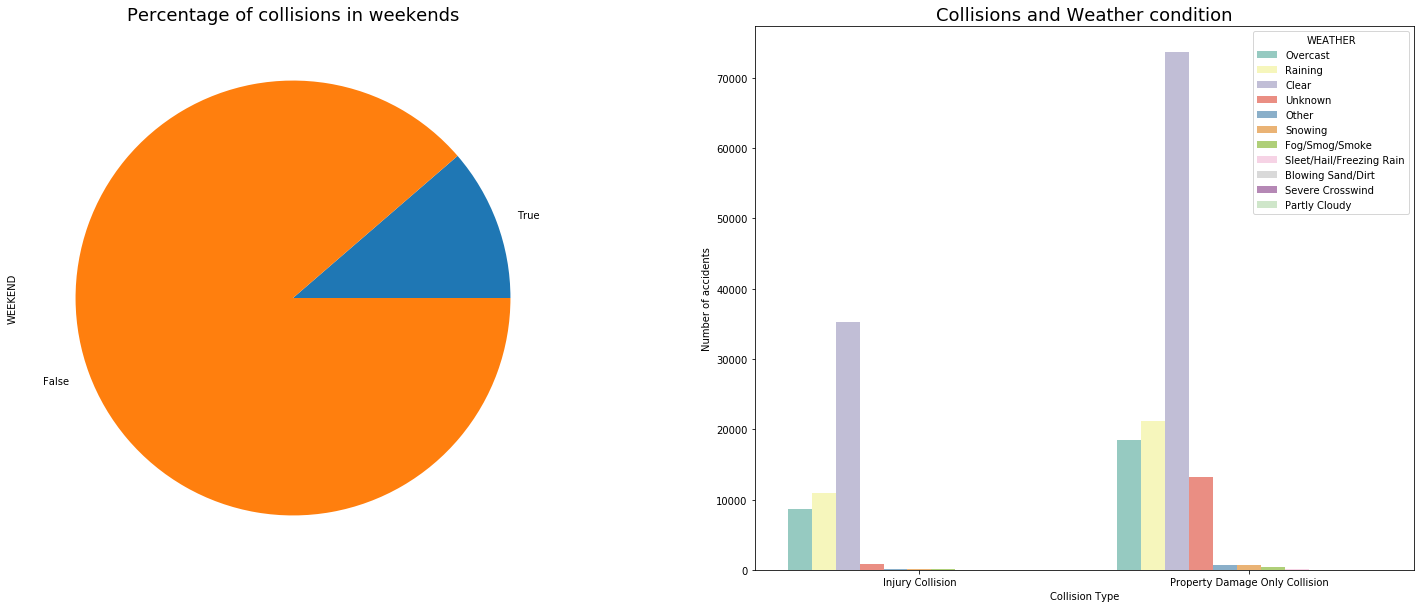

In [13]:
df_format['DAY'] = pd.to_datetime(df['INCDATE']).dt.dayofweek
df_format['WEEKEND'] = df_format['DAY'] > 5 
df_format['WEEKEND'].rename({'False':'Weekday', 'True':'Weekend'}, inplace=True)

plt.figure(figsize=(26, 10))

plt.subplot(1,2,1)
df_format['WEEKEND'].value_counts(ascending=True, normalize=True).mul(100).plot(kind = 'pie')
plt.title("Percentage of collisions in weekends", fontsize=18)

plt.subplot(1,2,2)
sns.countplot(x="SEVERITYDESC",hue="WEATHER", data=df_format, palette = "Set3")
plt.title("Collisions and Weather condition", fontsize=18)
plt.xlabel("Collision Type")
plt.ylabel("Number of accidents")

**Observations**
* Most accidents occur during weekdays.
* It seems that the weather is not a key factor. However, even though most accidents happen in clear weather, there are also many others during overcast and rainy days.

**Type of Collisions**

In [14]:
df_format['ADDRTYPE'].value_counts()

Block           121355
Intersection     63227
Name: ADDRTYPE, dtype: int64

Text(0.5, 0, 'Address type')

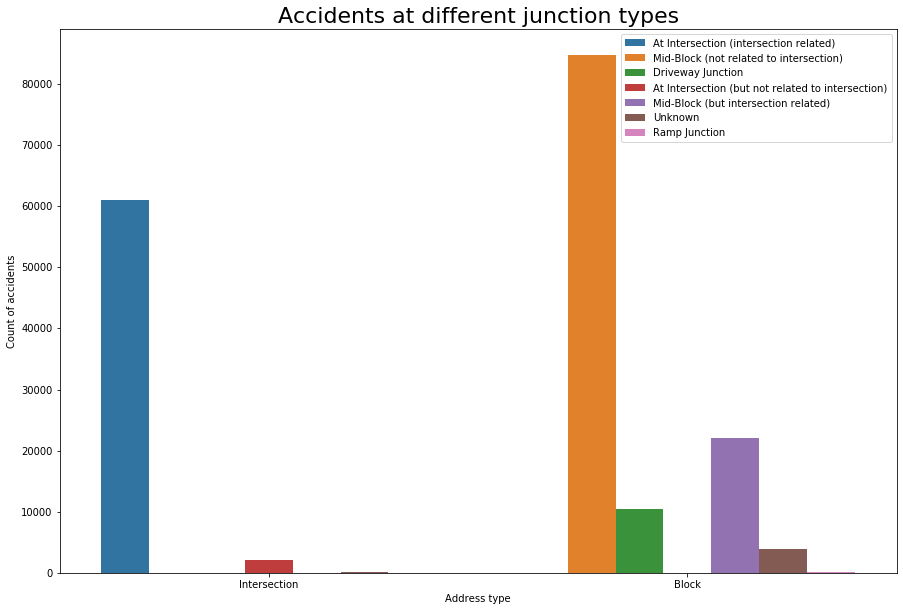

In [15]:
plt.figure(figsize=(15,10))
sns.countplot(x="ADDRTYPE", hue="JUNCTIONTYPE", data=df_format )
plt.title("Accidents at different junction types", fontsize=22)
plt.legend(loc="upper right")
plt.ylabel("Count of accidents")
plt.xlabel("Address type")

**Observations**
* After cleaning the data the 751 Alley collisions were dropped.
* Most accidents occur at mid-block and intersections.

## Selection of a feature set

**Let's look up for the most correlated features with SEVERITYCODE**

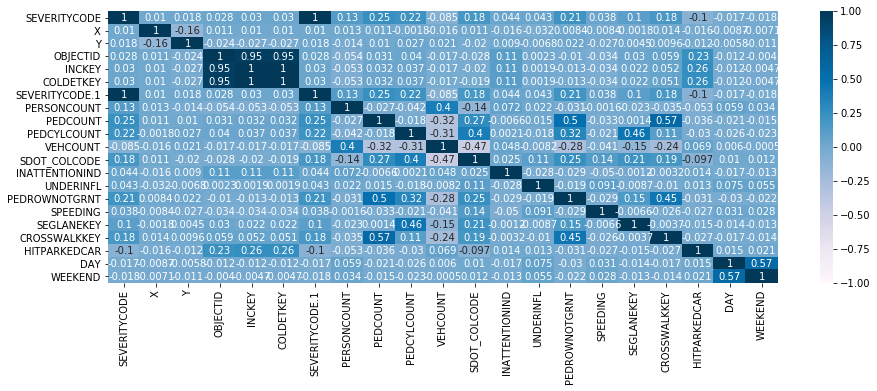

In [16]:
cor=df_format.corr()
plt.figure(figsize=(15,5))
sns.heatmap(cor,vmin=-1,vmax=1,cbar=True,cmap='PuBu',annot=True)
plt.show()

**Drop Unnecessary attributes**

In [17]:
df_features = df_format.drop(['OBJECTID','SEVERITYDESC','INCDATE' , 'INCDTTM','INCKEY', 'COLDETKEY', 'REPORTNO', 'LOCATION','STATUS', 'SEGLANEKEY', 'CROSSWALKKEY', 'SDOT_COLDESC','ST_COLDESC', 'DAY', 'HITPARKEDCAR','X','Y','SEVERITYCODE.1'],axis=1)

**One Hot Encoding and re-formatting**

In [18]:
features = pd.get_dummies(data=df_features, columns=['ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND'])
features['WEEKEND'] = features['WEEKEND'].astype('int64')
features.columns

Index(['SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'SDOT_COLCODE', 'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT',
       'SPEEDING', 'ST_COLCODE', 'WEEKEND', 'ADDRTYPE_Block',
       'ADDRTYPE_Intersection', 'COLLISIONTYPE_Angles', 'COLLISIONTYPE_Cycles',
       'COLLISIONTYPE_Head On', 'COLLISIONTYPE_Left Turn',
       'COLLISIONTYPE_Other', 'COLLISIONTYPE_Parked Car',
       'COLLISIONTYPE_Pedestrian', 'COLLISIONTYPE_Rear Ended',
       'COLLISIONTYPE_Right Turn', 'COLLISIONTYPE_Sideswipe',
       'JUNCTIONTYPE_At Intersection (but not related to intersection)',
       'JUNCTIONTYPE_At Intersection (intersection related)',
       'JUNCTIONTYPE_Driveway Junction',
       'JUNCTIONTYPE_Mid-Block (but intersection related)',
       'JUNCTIONTYPE_Mid-Block (not related to intersection)',
       'JUNCTIONTYPE_Ramp Junction', 'JUNCTIONTYPE_Unknown',
       'WEATHER_Blowing Sand/Dirt', 'WEATHER_Clear', 'WEATHER_Fog/Smog/Smoke',
       'WEATHER_Other', 'WEAT

In [19]:
features.shape

(184582, 60)

## Modeling

**Feature correlation and selection**

In [20]:
features.corr().style.background_gradient(cmap='Blues').format("{:.3f}")

**Choose the most correlated**

In [21]:
df_features = features[['SEVERITYCODE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','SDOT_COLCODE','PEDROWNOTGRNT','ADDRTYPE_Intersection','COLLISIONTYPE_Cycles','COLLISIONTYPE_Pedestrian','JUNCTIONTYPE_At Intersection (intersection related)']]

**Feature sets**

In [22]:
X = np.asarray(df_features.drop(['SEVERITYCODE'],axis=1))
y = np.asarray(df_features['SEVERITYCODE'])

**Normalization**

In [23]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.34423279, -0.19177846, -0.17342323, -0.45360246, -0.16061596,
         1.38540755, -0.17323536, -0.19182534,  1.423179  ],
       [-0.34423279, -0.19177846, -0.17342323,  0.2918873 , -0.16061596,
        -0.72180926, -0.17323536, -0.19182534, -0.7026523 ],
       [ 1.12835405, -0.19177846, -0.17342323, -0.00630861, -0.16061596,
        -0.72180926, -0.17323536, -0.19182534, -0.7026523 ],
       [ 0.39206063, -0.19177846, -0.17342323, -0.45360246, -0.16061596,
        -0.72180926, -0.17323536, -0.19182534, -0.7026523 ],
       [-0.34423279, -0.19177846, -0.17342323, -0.45360246, -0.16061596,
         1.38540755, -0.17323536, -0.19182534,  1.423179  ]])

**Test-Train Split**

In [24]:
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.8,test_size=0.2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (147665, 9) (147665,)
Test set: (36917, 9) (36917,)


<div class="alert alert-block alert-warning">
<b>Logistic Regression</b>
</div>

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
yhat_LR = lr.predict(X_test)

<div class="alert alert-block alert-warning">
<b>K-Nearest Neighbors (KNN)</b>
</div>

In [26]:
from sklearn.neighbors import KNeighborsClassifier
k = 7
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat_KNN = neigh.predict(X_test)

<div class="alert alert-block alert-warning">
<b>Decision Tree</b>
</div>

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "entropy", max_depth=10)
dt.fit(X_train, y_train)
yhat_DT = dt.predict(X_test)

<div class="alert alert-block alert-warning">
<b>Support Vector Machine (SVM)</b>
</div>

In [28]:
from sklearn import svm
clf = svm.SVC(kernel = "rbf")
clf.fit(X_train, y_train)
yhat_SVM = clf.predict(X_test)

# Results and Discussion <a name="results"></a>
<hr style="border:2px solid gray"> </hr>

In [29]:
from sklearn.metrics import f1_score, precision_score, recall_score
f1_LR = f1_score(y_test, yhat_LR)
f1_KNN = f1_score(y_test,yhat_KNN)
f1_DT = f1_score(y_test, yhat_DT)
f1_SVM = f1_score(y_test, yhat_SVM)


acc_LR = accuracy_score(y_test, yhat_LR)
acc_KNN = accuracy_score(y_test, yhat_KNN)
acc_DT = accuracy_score(y_test, yhat_DT)
acc_SVM = accuracy_score(y_test, yhat_SVM)


p_LR = precision_score(y_test, yhat_LR)
p_KNN = precision_score(y_test, yhat_KNN)
p_DT = precision_score(y_test, yhat_DT)
p_SVM = precision_score(y_test, yhat_SVM)


r_LR = recall_score(y_test, yhat_LR)
r_KNN = recall_score(y_test, yhat_KNN)
r_DT = recall_score(y_test, yhat_DT)
r_SVM = recall_score(y_test, yhat_SVM)

report = {
'Model': ['Logistic Regression','K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 
'Accuracy Score' : [acc_LR, acc_KNN, acc_DT, acc_SVM],
'F1 Score' : [f1_LR, f1_KNN, f1_DT, f1_SVM],
'Precision' : [p_LR, p_KNN, p_DT, p_SVM],
'Recall' : [r_LR, r_KNN, r_DT, r_SVM]
}

results = pd.DataFrame(report)
results

,Model,Accuracy Score,F1 Score,Precision,Recall
0,Logistic Regression,0.746350,0.841056,0.743927,0.967358
1,K-Nearest Neighbour,0.733158,0.825822,0.754637,0.911835
2,Decision Tree,0.747325,0.841646,0.744526,0.967904
3,Support Vector Machine,0.746323,0.843224,0.738044,0.983367


<div class="alert alert-block alert-warning">
<b>Discussion</b> 

<ul>
  <li>As we can see, all the selected models work similarly, from them we can tell the best was the Decision Tree, although it is likely that the KNN model may work better finding the optimal K.</li>
  <li>Also, as an extra, the Logistic Regression model performed well and on its advantages it could tell the probability for both classes of the target value.</li>
  <li>Obviously, these models can improve if the feature sets are handled better. For now, we can consider them good models for project purposes.</li>
</ul>
    
</div>

# Conclusion <a name="conclusion"></a>
<hr style="border:2px solid gray"> </hr>

<div class="alert alert-block alert-warning">
<b>Final Observations</b> 

<ul>
  <li>Most collisions occur during day light on weekdays and commonly against parked cars.</li>
  <li>Most accidents happen at street intersections.</li>
  <li>Surprisingly, speeding and intoxication do not cause too many collisions in Seattle.</li>
  <li>On the other hand, inattention is the most common cause of an accident.</li>
  <li>Weather conditions do not play a significant role.</li>
</ul>
    
</div>

In this project, all the knowledge of the IBM Data Science Course has been tested.

I analyzed the relation between car accidents and different factors, such as: negligence of drivers, environmental issues, locations, people involved and so on. All of this in order to create a predictive model for 2 types of collisions (property damage or people injuries).

Undoubtedly, a model with these characteristics working with real time data and alert notifications (whether it is appropriate or not to drive under certain conditions) would significantly reduce crashes in many cities around the world. Additionally, this model serves to make all the population aware of the importance of being careful while driving, not only driving properly but also taking care of others on the road.